<a href="https://colab.research.google.com/github/OlinMB/Plant-Disease-Detection-Live-Project-UDEMY-/blob/main/Plant_Diseases_Detection_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
pip install Adam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adamax
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from keras.layers import MaxPool2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

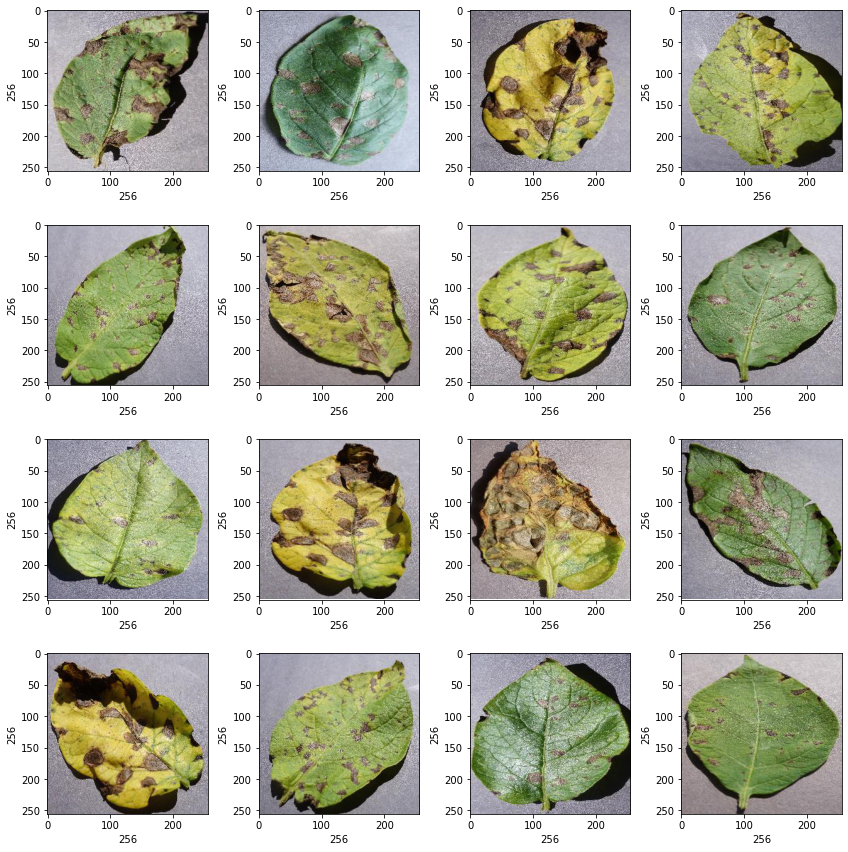

In [ ]:
#import dataset and plot the images to check the dataset
plt.figure(figsize = (12, 12))
path = "/drive/My Drive/Colab_Notebooks//Plant_images/Potato___Early_blight"
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) #width of image
  plt.ylabel(rand_img.shape[0], fontsize=10) #height of image

After visualizing the images, create a function which will convert the images into a numpy array. The data will be normaized after obtaining the numeric array values of the images

In [ ]:
#converting images to 256*256 pixelated array, from blue-green-red to greyscale. Greyscale has 256 levels, starting from 0 to 255
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256, 256))
      #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image) #converts image to array
    else:
      return np.array([])
  except:
    print(f"Error : {e}")
    return None

Now we will convert all the images into numpy array

In [ ]:
dir = "/drive/My Drive/Colab_Notebooks/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

#reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


We will also observe the number of images under different classes to see if the dataset is balanced or not

In [ ]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

Now, let us observe the shape of the image by considering the first image in the created list of 900 images. The shape of all images is the same as the first image.

In [ ]:
image_list[0].shape

(256, 256, 3)

Now, let us check the length of the list, which is the total number of images in the list. 

In [ ]:
label_list = np.array(label_list)

Using train test split to split the dataset into testing and training data. The train-test split is that of 80%-20% to that of the dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

Perform normalization on the data by dividing each array value by 255 as the lasrgest value on the greyscale is 255

In [ ]:
#Normalization
X_train = np.array(X_train, dtype = np.float16)/225.0 #float16 is considered for grayscale, as 16^2 = 256, which is the total number of levels on the greyscale
X_test = np.array(X_test, dtype=np.float16)/255.0

#Reshape the data to pixelated greyscale, as well as mentioning the label as a parameter of the data shape
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

Convert the dependent variable to categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Define the convolutional neural network model, which works best on image-related datasets

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)               

Set the loss to categorical cross entropy, as the output will be obtained accoring to their categorical labels

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer=Adamax(0.0001), metrics=['accuracy'])

Splitting the training and validation sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Fitting the model with a certain epoch value and dividing the model into a specific batch-size. The model is then run for the given dataset

In [ ]:
#Training the model
epochs = 50
batch_size = 128
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (X_val, y_val))

Epoch 1/50
5/5 [==============================] - 29s 5s/step - loss: 1.0537 - accuracy: 0.3819 - val_loss: 0.9435 - val_accuracy: 0.5208
Epoch 2/50
5/5 [==============================] - 26s 5s/step - loss: 0.9016 - accuracy: 0.7448 - val_loss: 0.7995 - val_accuracy: 0.9167
Epoch 3/50
5/5 [==============================] - 26s 5s/step - loss: 0.7719 - accuracy: 0.8819 - val_loss: 0.6809 - val_accuracy: 0.8333
Epoch 4/50
5/5 [==============================] - 26s 5s/step - loss: 0.6671 - accuracy: 0.7917 - val_loss: 0.5896 - val_accuracy: 0.8472
Epoch 5/50
5/5 [==============================] - 26s 5s/step - loss: 0.5773 - accuracy: 0.9080 - val_loss: 0.5083 - val_accuracy: 0.9514
Epoch 6/50
5/5 [==============================] - 26s 5s/step - loss: 0.5084 - accuracy: 0.9340 - val_loss: 0.4496 - val_accuracy: 0.9236
Epoch 7/50
5/5 [==============================] - 26s 5s/step - loss: 0.4511 - accuracy: 0.9149 - val_loss: 0.4030 - val_accuracy: 0.9514
Epoch 8/50
5/5 [==================

Saving the model in different formats

In [ ]:
model.save("/drive/My Drive/Colab_Notebooks/Plant_images/plant_disease_detection_and_prediction.h5")
#serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open("/drive/My Drive/Colab_Notebooks/Plant_images/plant_disease_detection_and_prediction_model.json", 'w') as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights('/drive/My Drive/Colab_Notebooks/Plant_images/plant_disease_detection_and_prediction_model_weights.h5')

Plot the accuracy of the training data and training history of the epoch and batches

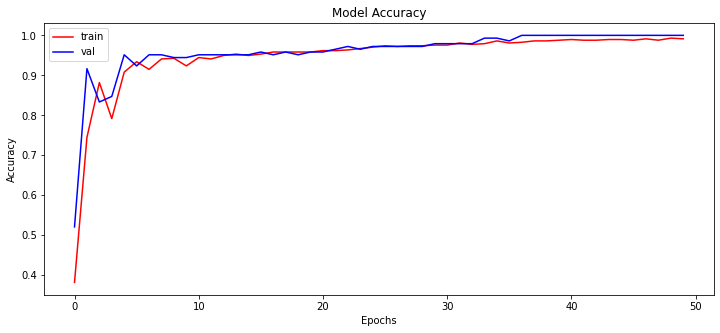

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Calculating the accuracy of the model

In [ ]:
print('[INFO] Calculating model accuracy')
scores = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {scores[1]*100}')

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 425ms/step - loss: 0.0737 - accuracy: 0.9833
Test Accuracy: 98.33333492279053


Predict on the testing dataset

In [ ]:
y_pred = model.predict(X_test)

Plotting the image to compare

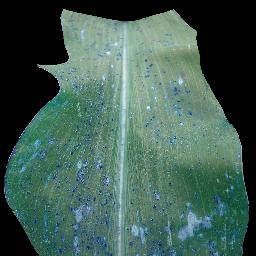

In [ ]:
img = array_to_img(X_test[10])
img

printing out the original and predicted value

In [ ]:
#Finding the max value from prediction list and comparing original value with predicted
print('Original: ', all_labels[np.argmax(y_test[10])])
print("predicted: ", all_labels[np.argmax(y_pred[10])])

Original:  Potato-Early_blight
predicted:  Potato-Early_blight
